# 5: Clasificación binaria

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train1 = pd.read_csv('df_train1_kpi.csv')
df_train3 = pd.read_csv('df_train3_kpi.csv')
df_train2 = pd.read_csv('df_train2_kpi.csv')
df_train4 = pd.read_csv('df_train4_kpi.csv')

In [3]:
df_test1 = pd.read_csv('df_test1_kpi.csv')
df_test3 = pd.read_csv('df_test3_kpi.csv')
df_test2 = pd.read_csv('df_test2_kpi.csv')
df_test4 = pd.read_csv('df_test4_kpi.csv')

In [4]:
df_train1.head()

Unnamed: 0  unitNumber  cycle  opset_id  sensorMeasure4  sensorMeasure9  \
0           0         1.0    1.0         0       -0.978417       -0.869179   
1           1         1.0    2.0         1       -0.688356       -0.965539   
2           2         1.0    3.0         2       -0.567306       -0.562371   
3           3         1.0    4.0         3       -0.833386       -0.719638   
4           4         1.0    5.0         4       -0.336628       -0.461920   

   sensorMeasure11  sensorMeasure12    rul  rul_norm  label  
0        -0.292733         0.365199  191.0  0.994792      0  
1        -0.216275         1.225379  190.0  0.989583      0  
2        -1.057313         1.419613  189.0  0.984375      0  
3        -1.038198         1.260064  188.0  0.979167      0  
4        -1.019084         1.100514  187.0  0.973958      0

In [5]:
df_test2.head()

Unnamed: 0  unitNumber  cycle  opset_id  sensorMeasure4  sensorMeasure6  \
0           0         1.0  258.0   11452.0        1.024747        0.713939   
1           1         2.0   55.0     792.0        1.806852        1.835699   
2           2         3.0  165.0    5073.0       -0.567018       -0.663018   
3           3         4.0   86.0    3152.0        0.457027        0.376125   
4           4         5.0  148.0    1926.0       -0.527115       -1.081612   

   sensorMeasure11  sensorMeasure13  sensorMeasure14  sensorMeasure15  RUL  \
0         0.923302         0.419304         1.233734        -0.761926   18   
1         1.400457         0.417740         0.888502        -1.191033   79   
2        -0.309863         0.417349         0.090557        -0.007777  106   
3         0.486427         0.417740        -0.014897        -0.107430  110   
4        -0.148746         0.425090         0.922143         0.108595   15   

   label  
0      1  
1      0  
2      0  
3      0  
4      1

In [6]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
df_train2.head()

unitNumber  cycle  opset_id  sensorMeasure4  sensorMeasure6  \
0         1.0    1.0      1423       -0.583859       -0.669937   
1         1.0    2.0      1424       -0.682747       -1.092353   
2         1.0    3.0      1425       -1.359244       -0.481786   
3         1.0    4.0      1426       -0.677565       -1.092353   
4         1.0    5.0      1427       -1.355098       -0.479942   

   sensorMeasure11  sensorMeasure13  sensorMeasure14  sensorMeasure15    rul  \
0        -0.305175         0.408202        -0.236620         0.022739  148.0   
1        -0.247764         0.407709         0.054488         0.066069  147.0   
2        -2.005164        -2.551520        -2.489093         2.165707  146.0   
3        -0.324311         0.407297         0.009853         0.032014  145.0   
4        -1.941375        -2.551767        -2.533728         2.168753  144.0   

   rul_norm  label  
0  0.993289      0  
1  0.986577      0  
2  0.979866      0  
3  0.973154      0  
4  0.966443      0

In [11]:
df_test1.head(50)

unitNumber  cycle  opset_id  sensorMeasure4  sensorMeasure9  \
0          1.0   31.0     372.0       -0.871242       -0.175323   
1          2.0   49.0      50.0        0.912006       -1.192854   
2          3.0  126.0     831.0        2.117793       -0.800015   
3          4.0  106.0     268.0        0.321081       -0.621532   
4          5.0   98.0     392.0        2.188106       -0.386178   
5          6.0  104.0     293.0        0.620284       -0.509542   
6          7.0  160.0     455.0        1.321914        1.101185   
7          8.0  166.0     665.0        1.369786       -0.738771   
8          9.0   55.0     503.0        0.828229       -0.072957   
9         10.0  192.0     352.0       -0.859274        0.216641   
10        11.0   83.0     272.0        1.419155       -1.863043   
11        12.0  217.0     531.0        0.733981        1.385534   
12        13.0  195.0     635.0        1.462539        0.220141   
13        14.0   46.0     360.0        0.540995       -1.842044   
14        15.0   76.0     141.0       -0.616920       -0.201570   
15        16.0  113.0      65.0       -0.558575        0.117775   
16        17.0  165.0     139.0        1.167825        3.177369   
17        18.0  133.0     104.0        2.161178       -0.202445   
18        19.0  135.0     165.0        0.237304       -0.250566   
19        20.0  184.0     109.0        2.224010        0.707471   
20        21.0  148.0    1395.0       -0.144179        2.523804   
21        22.0   39.0     686.0        0.811773       -0.261940   
22        23.0  130.0     118.0       -0.250396       -0.639030   
23        24.0  186.0     224.0        1.555292        7.887937   
24        25.0   48.0     235.0       -0.244412       -1.067741   
25        26.0   76.0     143.0       -0.349133        1.365411   
26        27.0  140.0    1031.0        0.362969       -0.783392   
27        28.0  158.0     394.0        0.081719        0.650602   
28        29.0  171.0     496.0        0.171480        1.374160   
29        30.0  143.0     875.0        0.581387       -0.060708   
30        31.0  196.0     759.0        2.382588        2.850149   
31        32.0  145.0    1022.0        0.222344        4.088161   
32        33.0   50.0     203.0        1.764734        0.101152   
33        34.0  203.0     566.0        3.404365       -1.936536   
34        35.0  198.0    1044.0        3.543494        1.878989   
35        36.0  126.0      37.0        2.131257       -0.184072   
36        37.0  121.0      56.0        1.293490       -1.460580   
37        38.0  125.0     456.0        0.026366        2.430188   
38        39.0   37.0     165.0       -0.383541        0.306758   
39        40.0  133.0     979.0        2.355659        0.703972   
40        41.0  123.0     383.0        1.799142       -1.883166   
41        42.0  156.0      36.0        3.049810       -2.757210   
42        43.0  172.0     931.0        2.044488       -0.478920   
43        44.0   54.0     159.0        1.579228       -0.055459   
44        45.0  152.0     934.0        0.837206        0.779215   
45        46.0  146.0     131.0        1.262073        1.942858   
46        47.0   73.0       1.0       -0.290789       -1.757177   
47        48.0   78.0     475.0       -0.299765       -0.373054   
48        49.0  303.0    1361.0        3.076738       -0.518291   
49        50.0   74.0     101.0       -1.059740        0.738094   

    sensorMeasure11  sensorMeasure12  RUL  label  
0         -0.950497         0.075254  112      0  
1          1.295920        -0.014081   98      0  
2          2.368073        -1.639976   69      0  
3          1.193810         0.236057   82      0  
4          0.223766        -1.336237   91      0  
5          0.274821        -1.246902   93      0  
6         -0.491003         1.022204   91      0  
7          0.887480        -2.175985   95      0  
8          0.836425        -0.174883  111      0  
9          0.887480         0.128855   96      0  
10         1.295920      

In [9]:
caracteristicas1 = df_train1.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas3 = df_train3.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas2 = df_train2.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas4 = df_train4.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

In [10]:
def variables(df_train, df_test, caracteristicas):
    X_train = df_train[caracteristicas]
    X_test = df_test[caracteristicas]

    y_train = df_train['label']
    y_test = df_test['label']
    
    return X_train, y_train, X_test, y_test

In [11]:
X_train, y_train, X_test, y_test = variables(df_train1, df_test1, caracteristicas1)

### GridSearch para la Clasificación.

In [12]:
def gridsearch(modelo, clasif, params=None, score=None):
    
    """Realiza la busqueda de los mejores hiperparametros para cada modelo de regresión empleando GridSearchCV.
    
    Args:
        modelo (str): identificador del modelo.
        clasif (classifier object): Clasificador a ser optimizado
        features (list): atributos.
        params (dict): parametros del Grid Search.
        score (str): score del Grid Search.
        
    Returns:
        objetos del clasificador optimizados.
        dataframe con las predicciones y el score.
    
    """
    
    gridsearch = model_selection.GridSearchCV(estimator=clasif, param_grid= params, scoring= score, cv=5, n_jobs=-1)
    gridsearch.fit(X_train, y_train)
    y_pred = gridsearch.predict(X_test)
    
    if hasattr(gridsearch, 'predict_proba'):   
        y_score = gridsearch.predict_proba(X_test)[:,1]
    elif hasattr(gridsearch, 'decision_function'):
        y_score = gridsearch.decision_function(X_test)
    else:
        y_score = y_pred
      
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return gridsearch.best_estimator_, df_predictions

### Métricas de clasificación.

In [13]:
def metricas(modelo, y_test, y_pred, y_score):
    
    metricas_clasbin = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }
    
    df_metricas = pd.DataFrame.from_dict(metricas_clasbin, orient='index')
    df_metricas.columns = [modelo] 
    
    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)
    
    roc_thresh = {
                  'Threshold' : thresh_roc,
                  'TPR' : tpr, 
                  'FPR' : fpr
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)
    
    thresh_prc = np.append(thresh_prc,1)
    
    prc_thresh = {
                  'Threshold' : thresh_prc, 
                  'Precision' : precision, 
                  'Recall' : recall
                 }
    
    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)
    print('\n')
    print('-----------------------------------------------------------')
    print(modelo, '\n')
    
    print('Matriz de confusión:\n')
    print(metrics.confusion_matrix(y_test, y_pred))
    
    print('\nReporte de clasificación:\n')
    print(metrics.classification_report(y_test, y_pred))
    
    print('\nMetricas:')
    print(df_metricas)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
    fig.set_size_inches(10,5)

    ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([-0.05, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend(loc="lower right")

    ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.legend(loc="lower left")
    
    return df_metricas, df_roc_thresh, df_prc_thresh

# 5.1: Regresión Logística


Mejores parametros:
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)




-----------------------------------------------------------
Logistic Regression 

Matriz de confusión:

[[60 15]
 [ 0 25]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        75
           1       0.62      1.00      0.77        25

   micro avg       0.85      0.85      0.85       100
   macro avg       0.81      0.90      0.83       100
weighted avg       0.91      0.85      0.86       100


Metricas:
           Logistic Regression
Accuracy              0.850000
Precision             0.625000
Recall                1.000000
F1 Score              0.769231
ROC AUC               0.969067


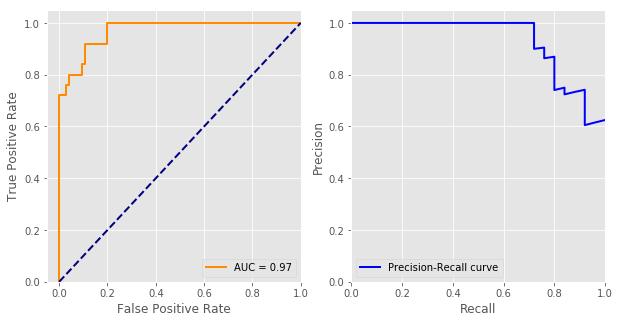

In [14]:
modelo = 'Logistic Regression'
clf_lgr = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgr, pred_lgr = gridsearch(modelo, clf_lgr, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_lgr)
print('\n')

metricas_lgr, roc_lgr, prc_lgr = metricas(modelo, y_test, pred_lgr.y_pred, pred_lgr.y_score)

In [15]:
y_predict = clf_lgr.predict(X_test)
y_predict = pd.DataFrame(y_predict)
y_predict.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   0   0   1   0   0   0   0   1   0   0 ...   1   1   1   1   0   0   0   0   

   98  99  
0   0   1  

[1 rows x 100 columns]

# 5.2: Árboles de decisión


Mejores parametros:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')




-----------------------------------------------------------
Decision Tree 

Matriz de confusión:

[[60 15]
 [ 1 24]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        75
           1       0.62      0.96      0.75        25

   micro avg       0.84      0.84      0.84       100
   macro avg       0.80      0.88      0.82       100
weighted avg       0.89      0.84      0.85       100


Metricas:
           Decision Tree
Accuracy        0.840000
Precision       0.615385
Recall          0.960000
F1 Score        0.750000
ROC AUC         0

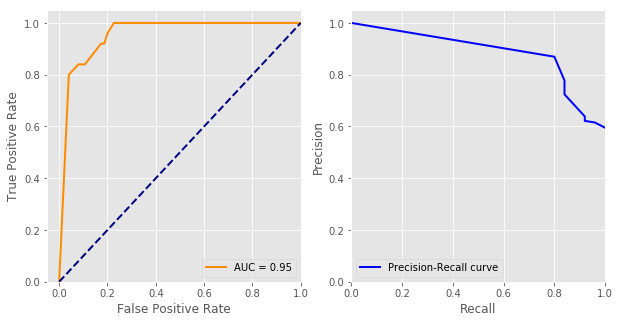

In [16]:
modelo = 'Decision Tree'
clf_dt = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dt, pred_dt = gridsearch(modelo, clf_dt, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_dt)
print('\n')

metricas_dt, roc_dt, prc_dt = metricas(modelo, y_test, pred_dt.y_pred, pred_dt.y_score)

In [17]:
y_predict = clf_dt.predict(X_test)
y_predict = pd.DataFrame(y_predict)
y_predict.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   0   0   1   0   0   0   0   1   0   0 ...   1   1   1   1   0   0   0   1   

   98  99  
0   0   1  

[1 rows x 100 columns]

# 5.3: Bosques aleatorios


Mejores parametros:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)




-----------------------------------------------------------
Random Forest 

Matriz de confusión:

[[60 15]
 [ 0 25]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        75
           1       0.62      1.00      0.77        25

   micro avg       0.85      0.85      0.85       100
   macro avg       0.81      0.90      0.83       100
weighted avg       0.91      0.85      0.86       100


Metricas:
           Random Forest
Accuracy        0.850000
Precision       0.625000
Recal

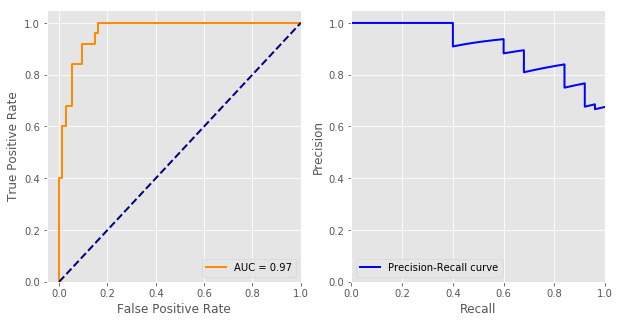

In [18]:
modelo = 'Random Forest'
clf_rfc = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8,12], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfc, pred_rfc = gridsearch(modelo, clf_rfc, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_rfc)
print('\n')

metricas_rfc, roc_rfc, prc_rfc = metricas(modelo, y_test, pred_rfc.y_pred, pred_rfc.y_score)

In [19]:
y_predict = clf_rfc.predict(X_test)
y_predict = pd.DataFrame(y_predict)
y_predict.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   0   0   1   0   0   0   0   1   0   0 ...   1   1   1   1   0   0   0   0   

   98  99  
0   0   1  

[1 rows x 100 columns]

# 5.4: Vectores lineales soportados - Clasificador


Mejores parametros:
 LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)




-----------------------------------------------------------
Linear Support Vector Classification 

Matriz de confusión:

[[65 10]
 [ 1 24]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        75
           1       0.71      0.96      0.81        25

   micro avg       0.89      0.89      0.89       100
   macro avg       0.85      0.91      0.87       100
weighted avg       0.92      0.89      0.89       100


Metricas:
           Linear Support Vector Classification
Accuracy                               0.890000
Precision                              0.705882
Recall                                 0.960000
F1 Score                               0.813559
ROC AUC      

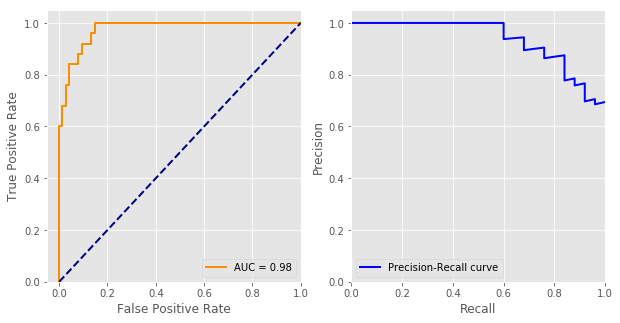

In [20]:
modelo = 'Linear Support Vector Classification'
clf_svl = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svl, pred_svl = gridsearch(modelo, clf_svl, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_svl)
print('\n')

metricas_svl, roc_svl, prc_svl = metricas(modelo, y_test, pred_svl.y_pred, pred_svl.y_score)

In [21]:
y_predict = clf_svl.predict(X_test)
y_predict = pd.DataFrame(y_predict)
y_predict.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   0   0   1   0   0   0   0   0   0   0 ...   1   1   1   1   0   0   0   0   

   98  99  
0   0   1  

[1 rows x 100 columns]

# 5.5: K vecinos más próximos


Mejores parametros:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
           weights='uniform')




-----------------------------------------------------------
KNN 

Matriz de confusión:

[[70  5]
 [ 5 20]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.80      0.80      0.80        25

   micro avg       0.90      0.90      0.90       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.90      0.90      0.90       100


Metricas:
                KNN
Accuracy   0.900000
Precision  0.800000
Recall     0.800000
F1 Score   0.800000
ROC AUC    0.957867


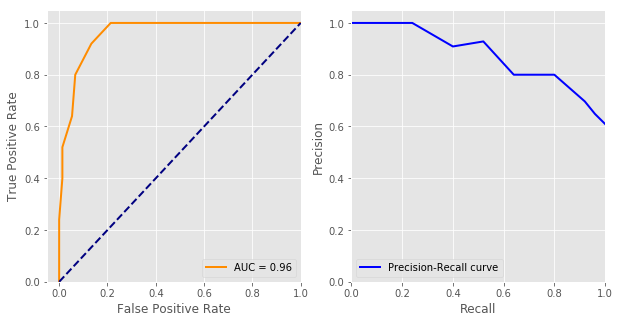

In [22]:
modelo = 'KNN'
clf_knn = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knn, pred_knn = gridsearch(modelo, clf_knn, params=gs_params, score=gs_score)
print('\nMejores parametros:\n', clf_knn)
print('\n')

metricas_knn, roc_knn, prc_knn = metricas(modelo, y_test, pred_knn.y_pred, pred_knn.y_score)

In [23]:
y_predict = clf_knn.predict(X_test)
y_predict = pd.DataFrame(y_predict)
y_predict.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  97  \
0   0   0   0   0   0   0   0   0   0   0 ...   1   1   0   1   0   0   0   0   

   98  99  
0   0   1  

[1 rows x 100 columns]

In [24]:
y_test = pd.DataFrame(y_test)
y_test.T

0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  \
label   0   0   0   0   0   0   0   0   0   0 ...   0   1   0   0   0   0   0   

       97  98  99  
label   0   0   1  

[1 rows x 100 columns]

# 5.6: Métricas finales

In [25]:
#comparando todas las metricas
metricas_bc = pd.concat([metricas_lgr, metricas_dt, metricas_rfc, metricas_svl, metricas_knn], axis=1)
metricas_bc

Logistic Regression  Decision Tree  Random Forest  \
Accuracy              0.850000       0.840000       0.850000   
Precision             0.625000       0.615385       0.625000   
Recall                1.000000       0.960000       1.000000   
F1 Score              0.769231       0.750000       0.769231   
ROC AUC               0.969067       0.954133       0.966933   

           Linear Support Vector Classification       KNN  
Accuracy                               0.890000  0.900000  
Precision                              0.705882  0.800000  
Recall                                 0.960000  0.800000  
F1 Score                               0.813559  0.800000  
ROC AUC                                0.975467  0.957867

Text(0.5, 1.0, 'Precision Recall Curve')

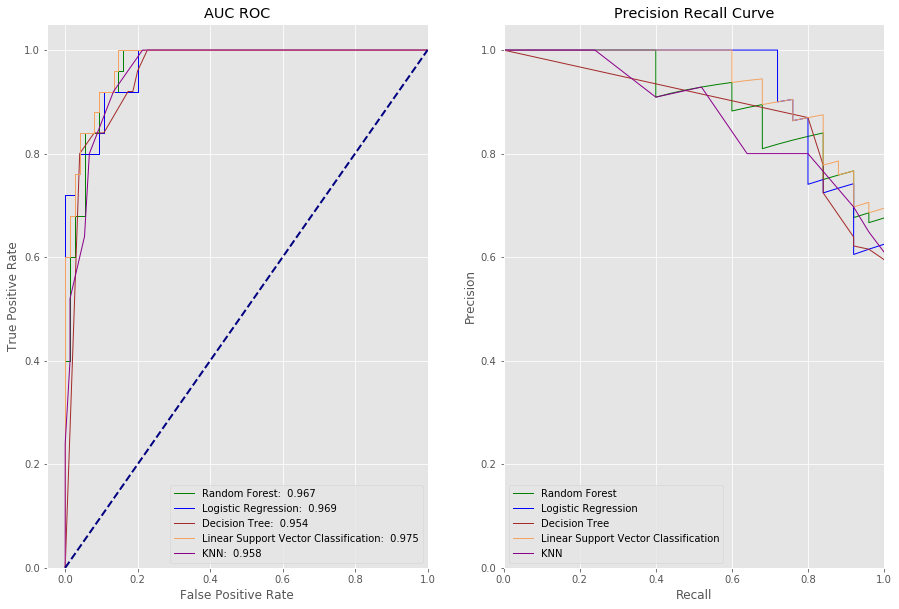

In [26]:
# Graficando las curvas ROC y Precisión-Recall de todos los algoritmos.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(15,10)

ax1.plot(roc_rfc.FPR, roc_rfc.TPR, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0] + ':  %.3f' % metricas_rfc.at['ROC AUC', metricas_rfc.columns.values.tolist()[0]])
ax1.plot(roc_lgr.FPR, roc_lgr.TPR, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0] + ':  %.3f' % metricas_lgr.at['ROC AUC', metricas_lgr.columns.values.tolist()[0]])
ax1.plot(roc_dt.FPR, roc_dt.TPR, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0] + ':  %.3f' % metricas_dt.at['ROC AUC', metricas_dt.columns.values.tolist()[0]])
ax1.plot(roc_svl.FPR, roc_svl.TPR, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0] + ':  %.3f' % metricas_svl.at['ROC AUC', metricas_svl.columns.values.tolist()[0]])
ax1.plot(roc_knn.FPR, roc_knn.TPR, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0] + ':  %.3f' % metricas_knn.at['ROC AUC', metricas_knn.columns.values.tolist()[0]])
#ax1.plot(roc_svc.FPR, roc_svc.TPR, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0] + ':  %.3f' % metricas_svc.at['ROC AUC', metricas_svc.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right")
ax1.set_title('AUC ROC')

ax2.plot(prc_rfc.Recall, prc_rfc.Precision, color='green', lw=1, label= metricas_rfc.columns.values.tolist()[0])
ax2.plot(prc_lgr.Recall, prc_lgr.Precision, color='blue', lw=1, label= metricas_lgr.columns.values.tolist()[0])
ax2.plot(prc_dt.Recall, prc_dt.Precision, color='brown', lw=1, label= metricas_dt.columns.values.tolist()[0])
ax2.plot(prc_svl.Recall, prc_svl.Precision, color='sandybrown', lw=1, label= metricas_svl.columns.values.tolist()[0])
ax2.plot(prc_knn.Recall, prc_knn.Precision, color='darkmagenta', lw=1, label= metricas_knn.columns.values.tolist()[0])
#ax2.plot(prc_svc.Recall, prc_svc.Precision, color='red', lw=1, label= metricas_svc.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left")
ax2.set_title('Precision Recall Curve')